# BRATS METS 2023 Data Exploration
We can use Brain Viewer or other solutions to show the brain in 3D, we'll also use python to explore a bit more


### Sample 00005 -- Brain Viewer  https://socr.umich.edu/HTML5/BrainViewer/
### T1C

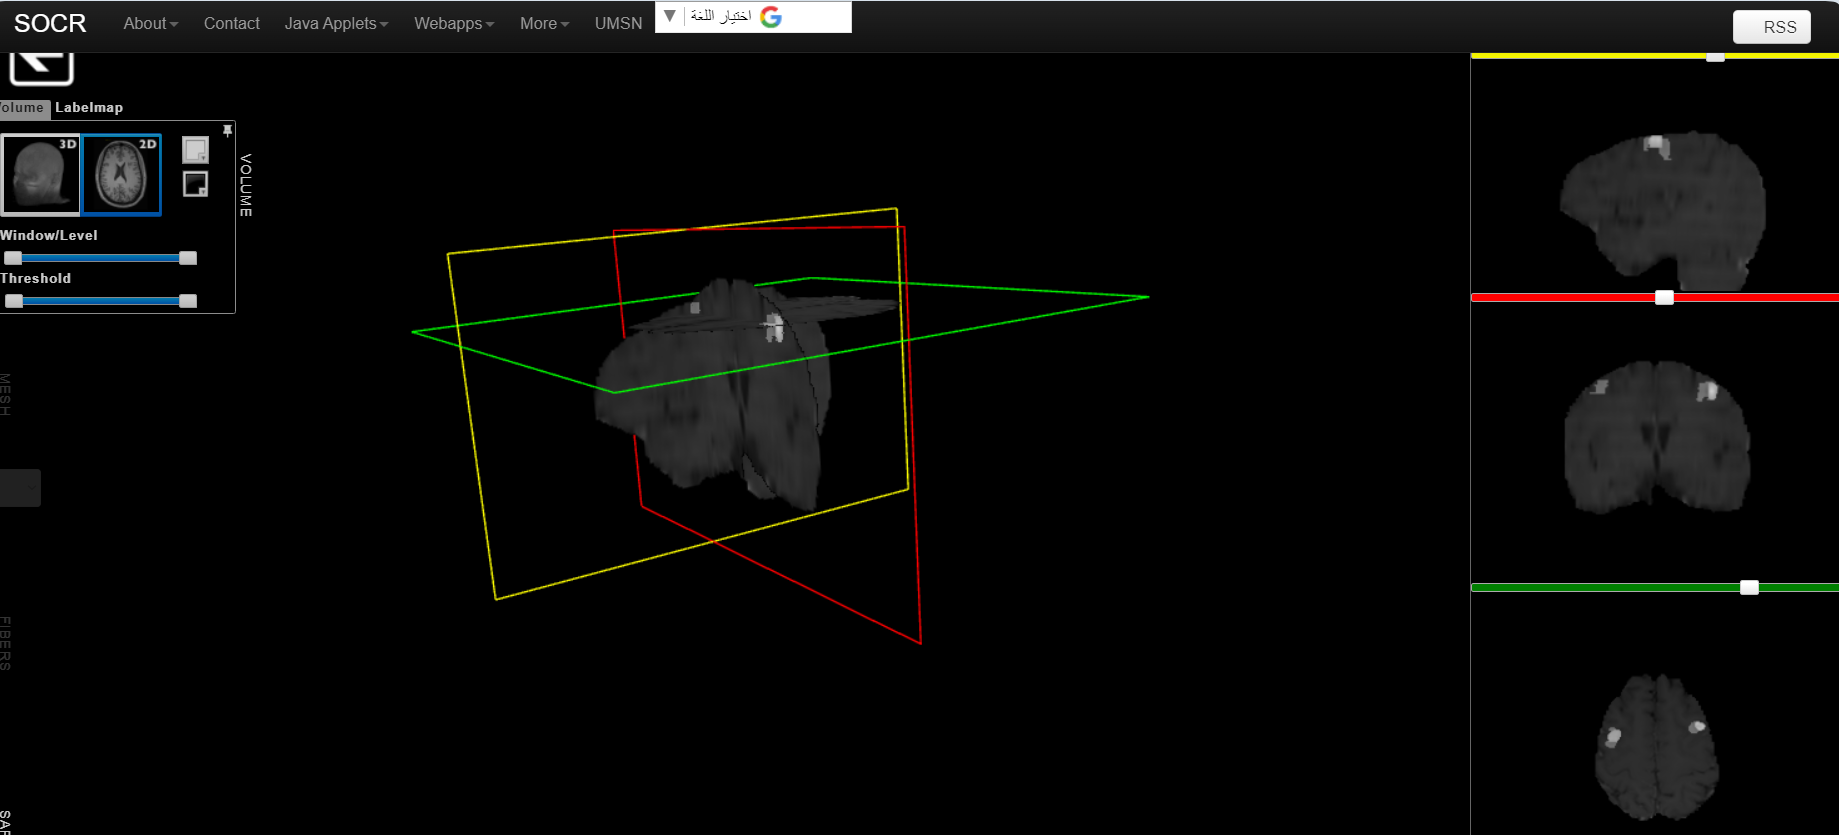
### T1n
![image.png](attachment:5e978a4d-0cf0-4ba4-abef-ab6e60a5f438.png)
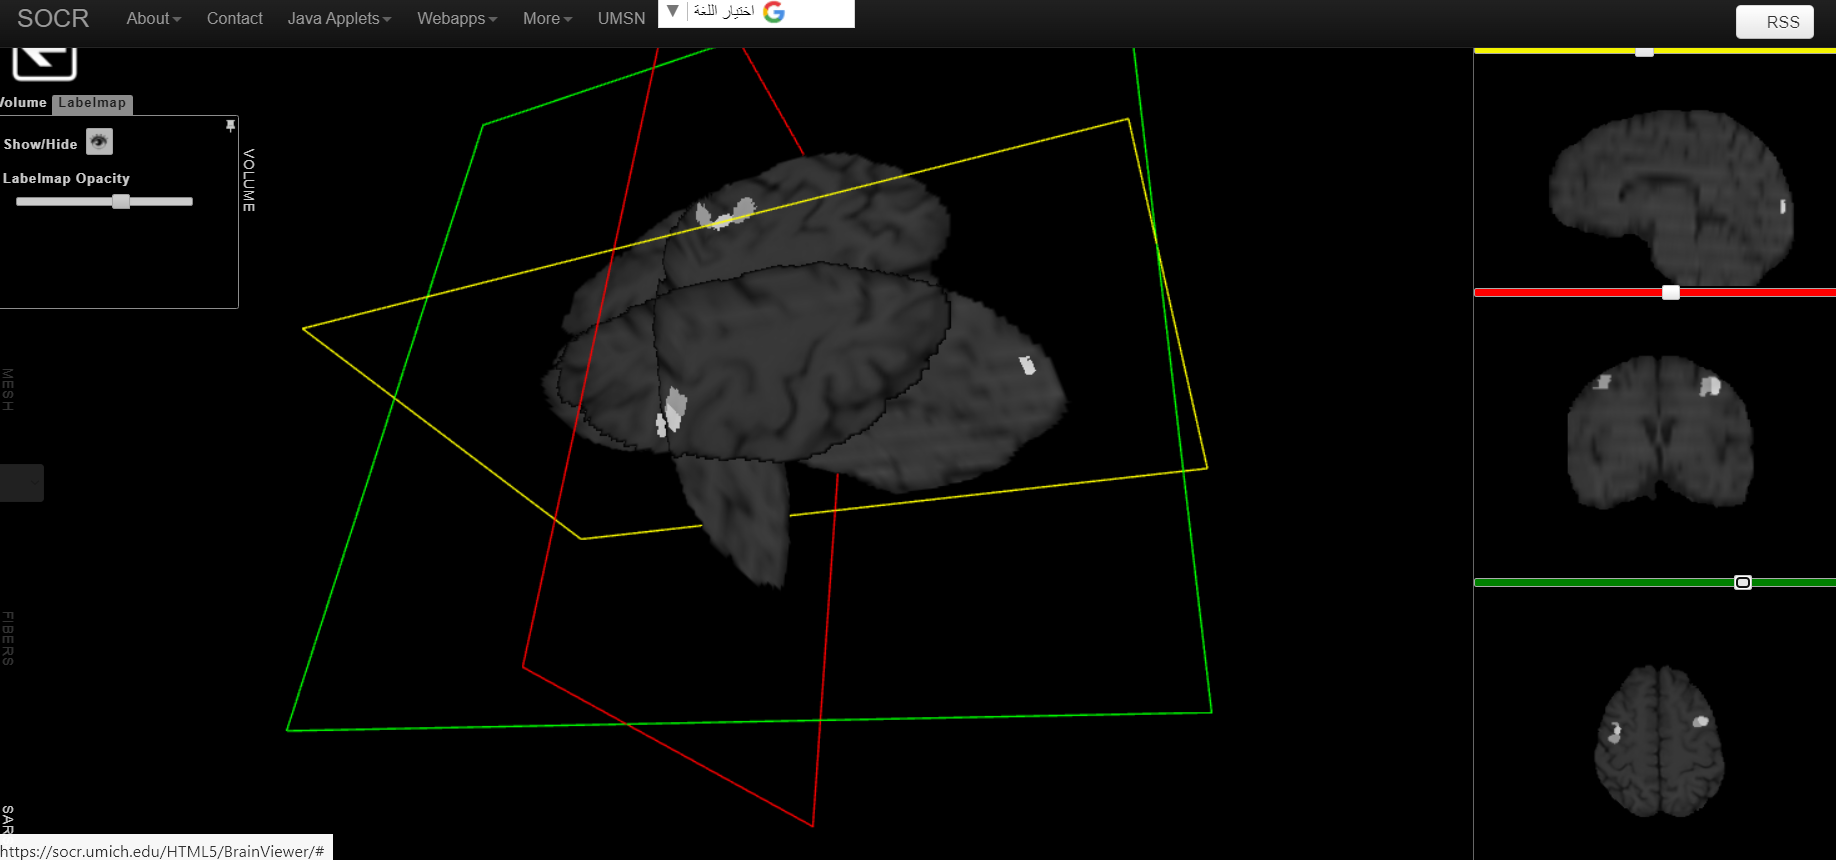
### T2f
![image.png](attachment:178fabce-1dec-4cfc-b84f-6aedefa17514.png)
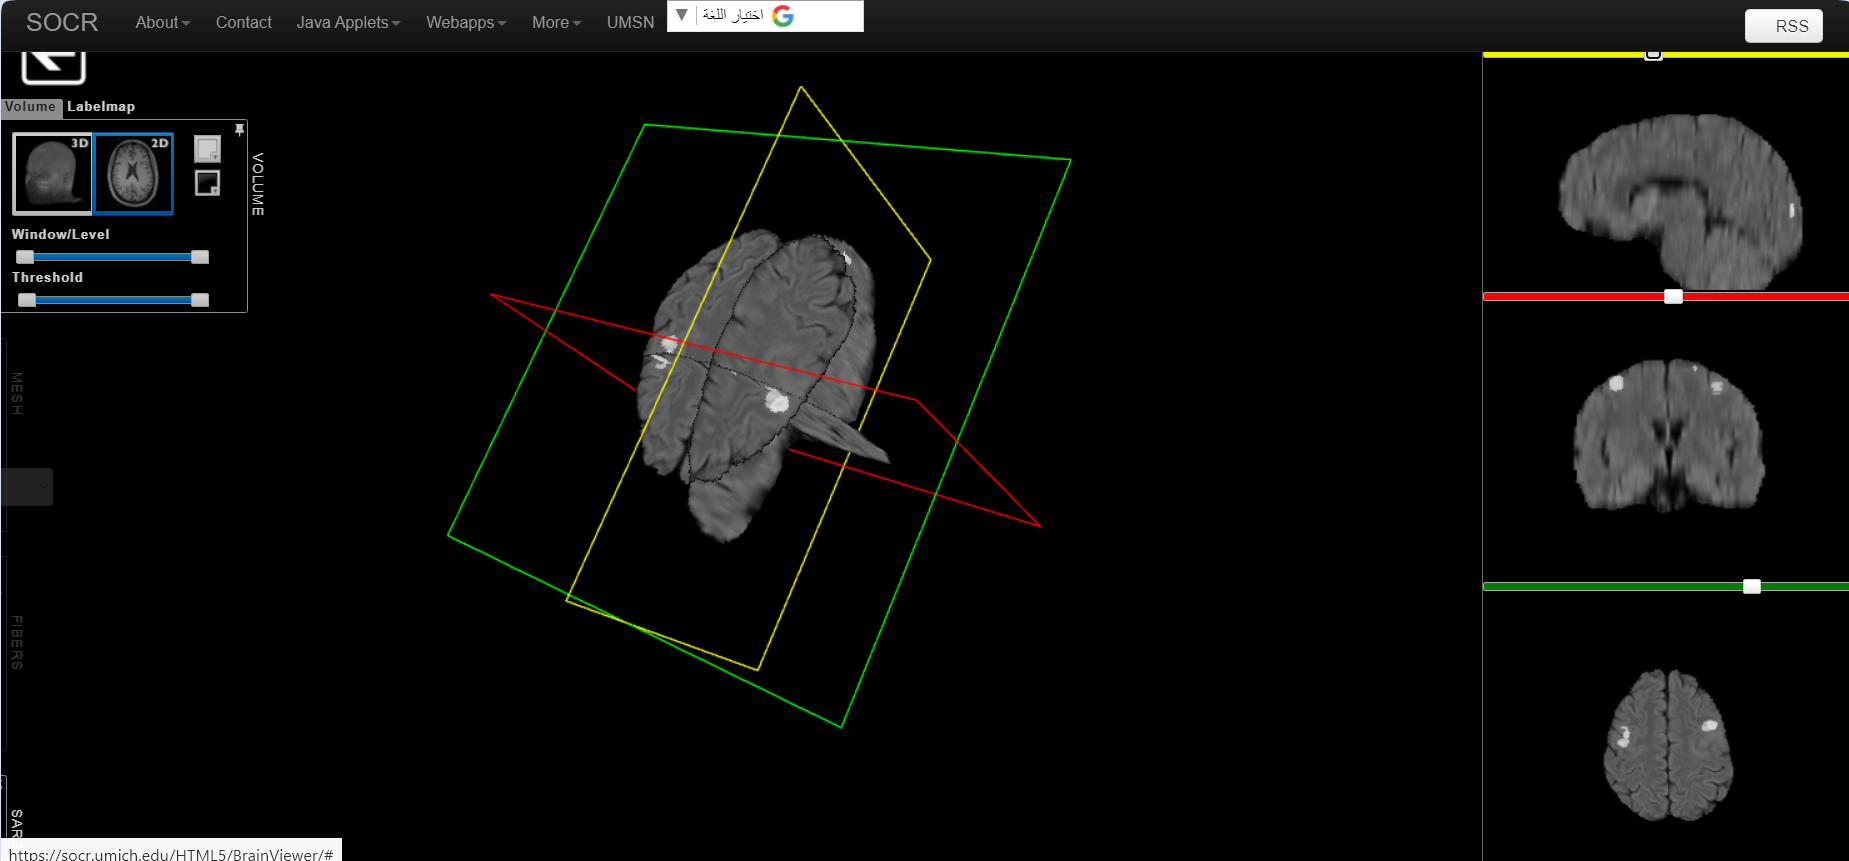
### T2w
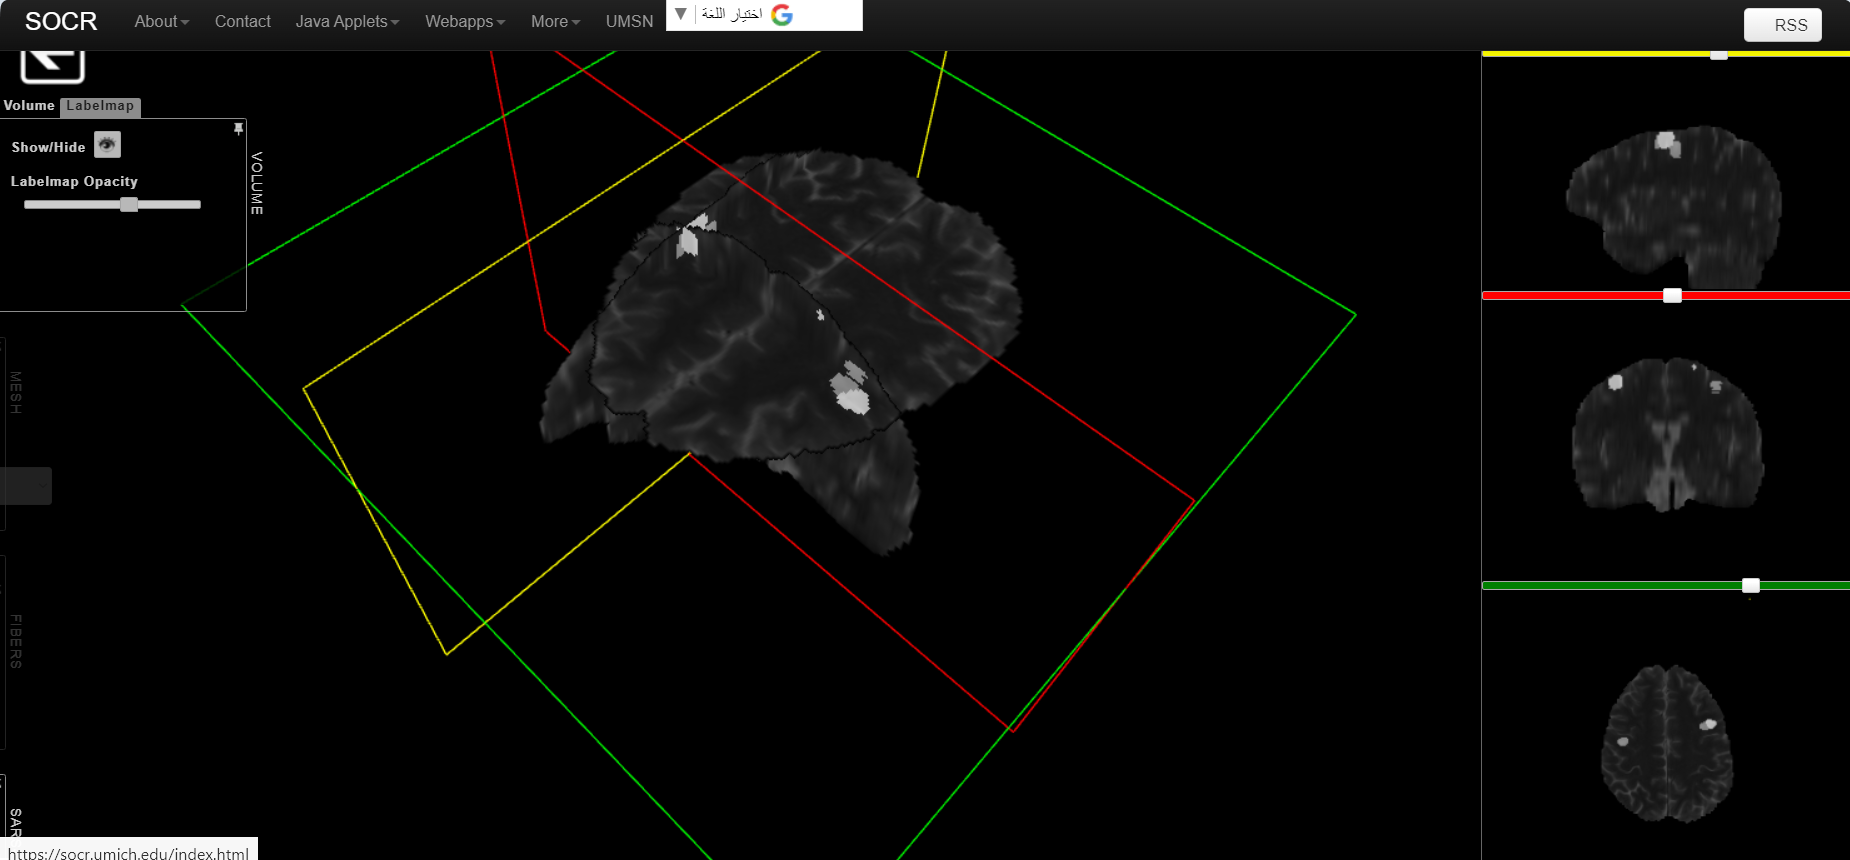

# Imports

In [ ]:
import os
import tarfile
import numpy as np
import pandas as pd
import nibabel as nib
from glob import glob as glb

from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print(torch.__version__)

2.1.2


# Data Exploration

In [ ]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input/ssssample/sample'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
import os
import pandas as pd

base_dir = '/kaggle/input/ssssample/sample'
data = {'folder_path': [], 't2': [], 'flair': [], 't1': [], 't1ce': [], 'seg': []}

for subdir, _, filenames in os.walk(base_dir):
    folder_data = {'folder_path': subdir, 't2': None, 'flair': None, 't1': None, 't1ce': None, 'seg': None}

    for filename in filenames:
        file_path = os.path.join(subdir, filename)
        if '-t2w.nii' in filename:
            folder_data['t2'] = file_path
        elif '-t2f.nii' in filename:
            folder_data['flair'] = file_path
        elif '-t1n.nii' in filename:
            folder_data['t1'] = file_path
        elif '-t1c.nii' in filename:
            folder_data['t1ce'] = file_path
        elif '-seg.nii' in filename:
            folder_data['seg'] = file_path

    if any(value is not None for value in folder_data.values()):
        for key, value in folder_data.items():
            data[key].append(value)

df = pd.DataFrame(data)
# print(df.head(12))


In [ ]:
df = df.drop(df.index[0])
df.reset_index(drop=True, inplace=True)
df.to_csv('/kaggle/working/mri_data_paths.csv', index=False)

print(df.shape)
df.head()

(10, 6)


folder_path  \
0  /kaggle/input/ssssample/sample/BraTS-MET-00243...   
1  /kaggle/input/ssssample/sample/BraTS-MET-00029...   
2  /kaggle/input/ssssample/sample/BraTS-MET-00005...   
3  /kaggle/input/ssssample/sample/BraTS-MET-00292...   
4  /kaggle/input/ssssample/sample/BraTS-MET-00539...   

                                                  t2  \
0  /kaggle/input/ssssample/sample/BraTS-MET-00243...   
1  /kaggle/input/ssssample/sample/BraTS-MET-00029...   
2  /kaggle/input/ssssample/sample/BraTS-MET-00005...   
3  /kaggle/input/ssssample/sample/BraTS-MET-00292...   
4  /kaggle/input/ssssample/sample/BraTS-MET-00539...   

                                               flair  \
0  /kaggle/input/ssssample/sample/BraTS-MET-00243...   
1  /kaggle/input/ssssample/sample/BraTS-MET-00029...   
2  /kaggle/input/ssssample/sample/BraTS-MET-00005...   
3  /kaggle/input/ssssample/sample/BraTS-MET-00292...   
4  /kaggle/input/ssssample/sample/BraTS-MET-00539...   

                                                  t1  \
0  /kaggle/input/ssssample/sample/BraTS-MET-00243...   
1  /kaggle/input/ssssample/sample/BraTS-MET-00029...   
2  /kaggle/input/ssssample/sample/BraTS-MET-00005...   
3  /kaggle/input/ssssample/sample/BraTS-MET-00292...   
4  /kaggle/input/ssssample/sample/BraTS-MET-00539...   

                                                t1ce  \
0  /kaggle/input/ssssample/sample/BraTS-MET-00243...   
1  /kaggle/input/ssssample/sample/BraTS-MET-00029...   
2  /kaggle/input/ssssample/sample/BraTS-MET-00005...   
3  /kaggle/input/ssssample/sample/BraTS-MET-00292...   
4  /kaggle/input/ssssample/sample/BraTS-MET-00539...   

                                                 seg  
0  /kaggle/input/ssssample/sample/BraTS-MET-00243...  
1  /kaggle/input/ssssample/sample/BraTS-MET-00029...  
2  /kaggle/input/ssssample/sample/BraTS-MET-00005...  
3  /kaggle/input/ssssample/sample/BraTS-MET-00292...  
4  /kaggle/input/ssssample/sample/BraTS-MET-00539...

In [ ]:
df.iloc[8, 1:]['t2']

'/kaggle/input/ssssample/sample/BraTS-MET-00379-000/BraTS-MET-00379-000-t2w.nii'

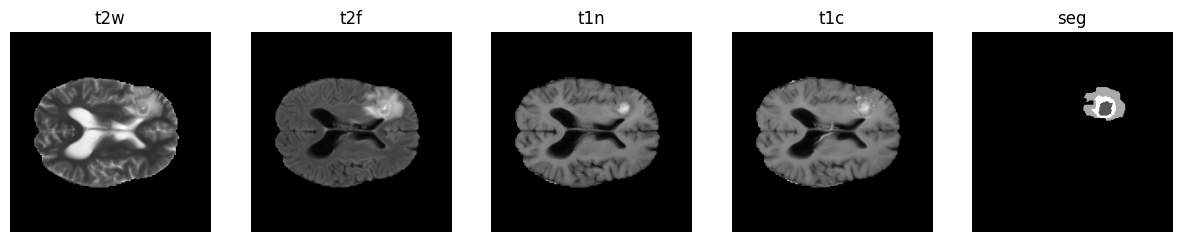

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd

plt.figure(figsize=(15, 15))
for idx, filepath in enumerate(df.iloc[8, 1:], start=1):
    if pd.notna(filepath):
        img_data = nib.load(filepath).get_fdata().astype(np.float32)

        # the third dimension is the one we slice across
        middle_slice = img_data.shape[2] // 2  # Use the middle slice
        plt.subplot(1, 5, idx)
        plt.imshow(img_data[:, :, middle_slice], cmap='gray')

        file_parts = filepath.split('/')
        filename = file_parts[-1]
        modality_name = filename.split('-')[4].replace('.nii','')  # Assuming format 'BraTS-MET-XXXXX-XXX-t1c.nii'
        plt.title(modality_name)
        plt.axis("off")

plt.show()

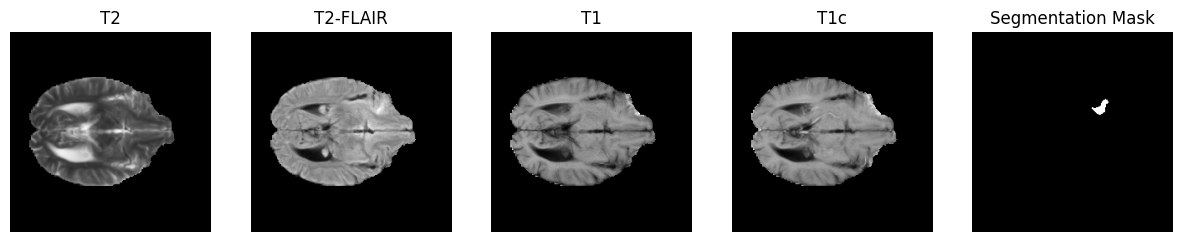

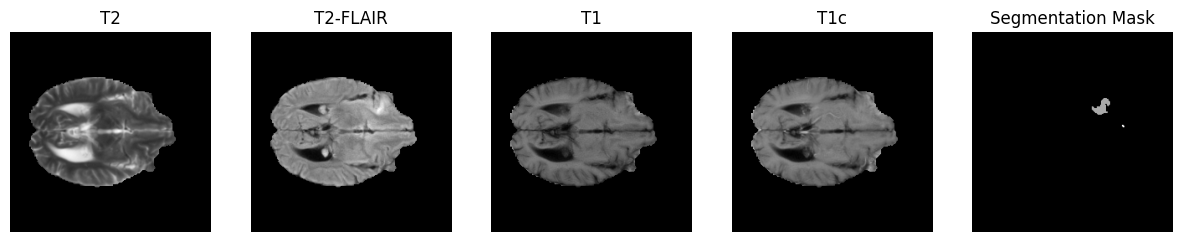

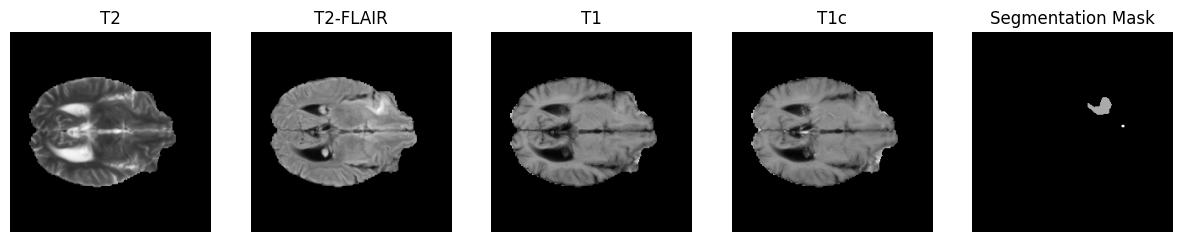

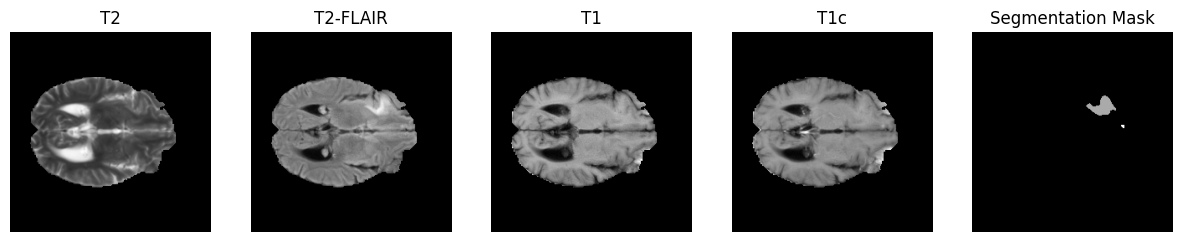

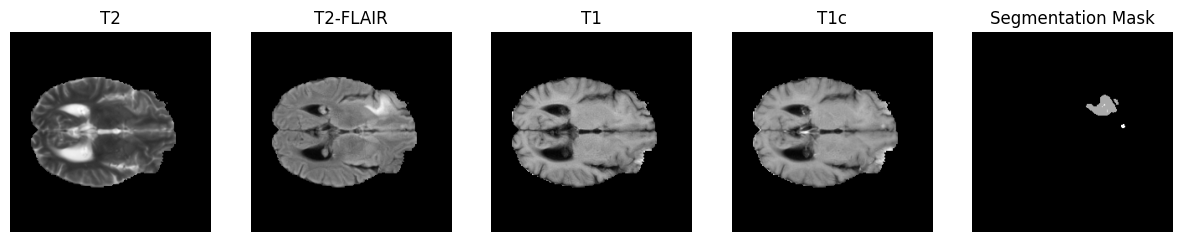

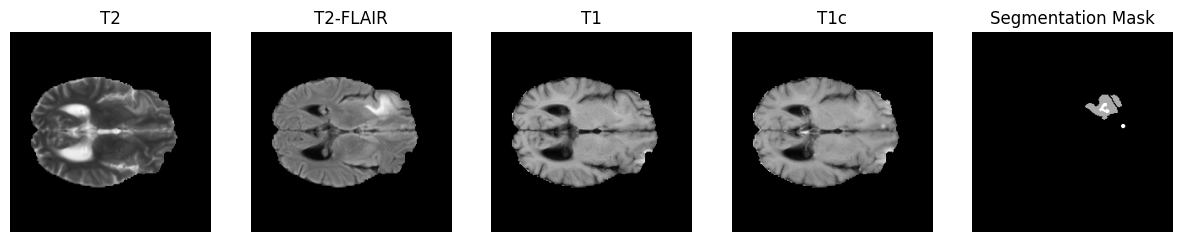

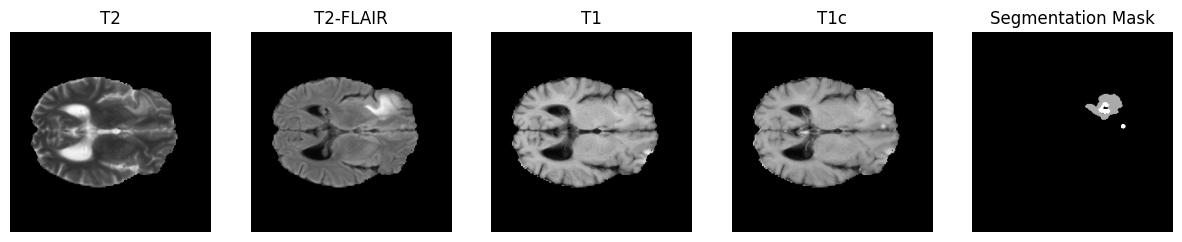

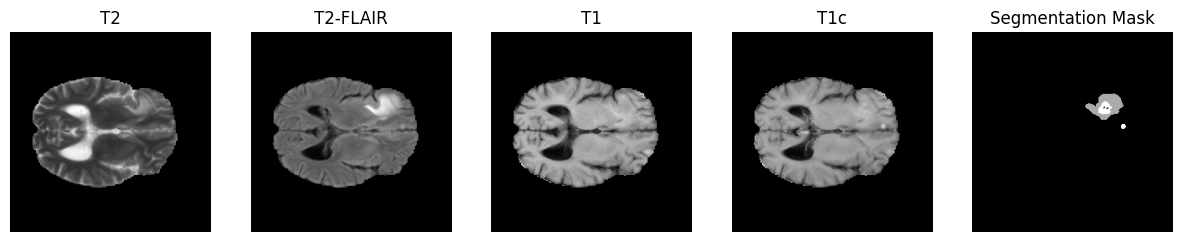

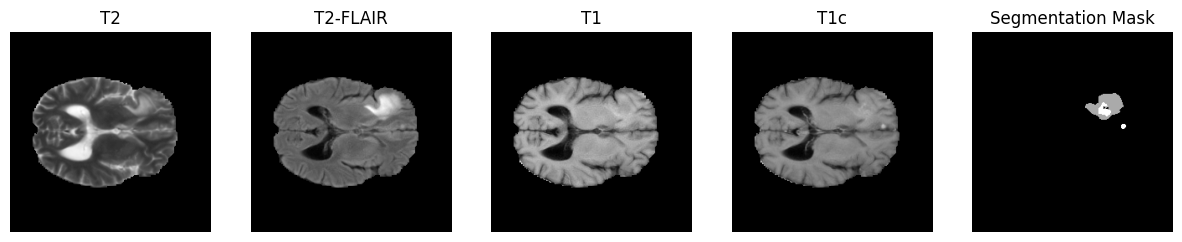

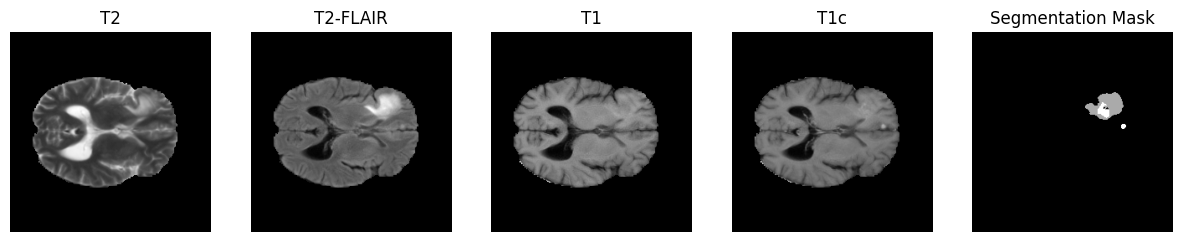

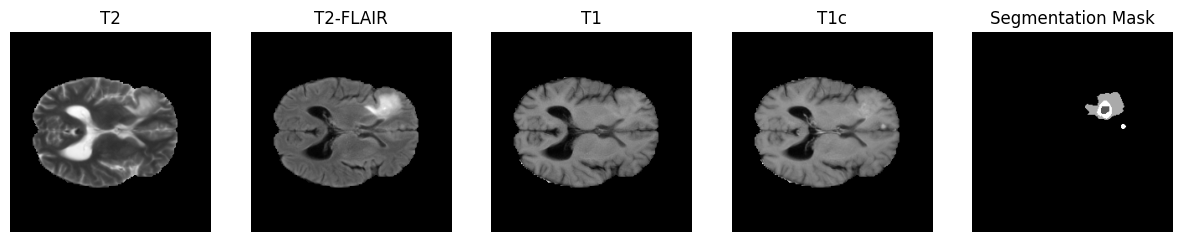

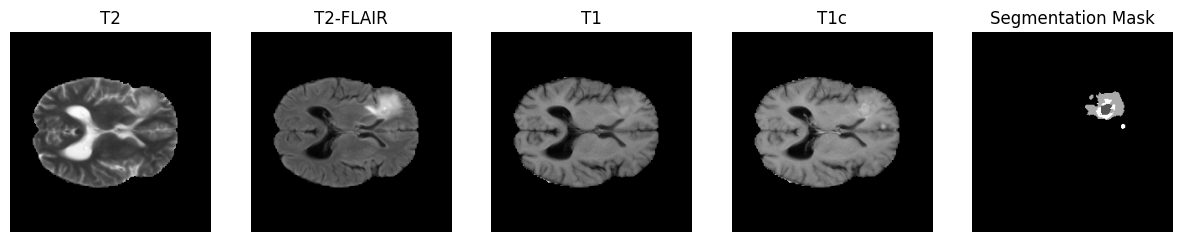

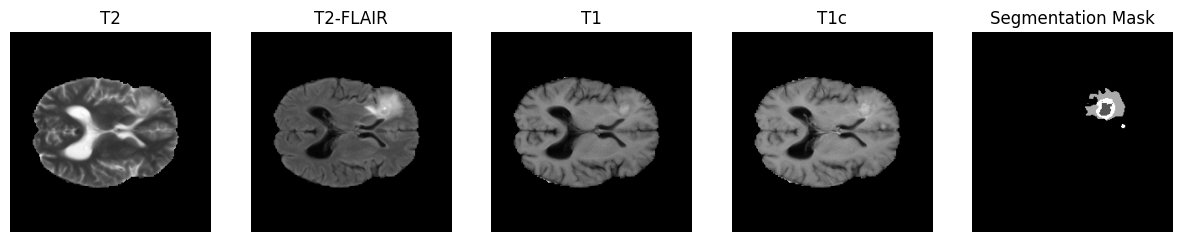

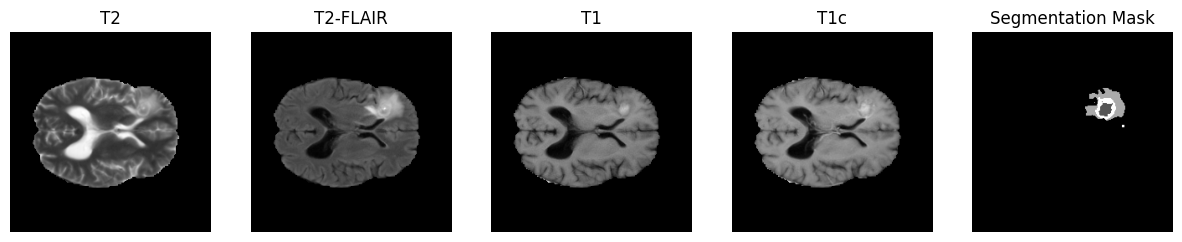

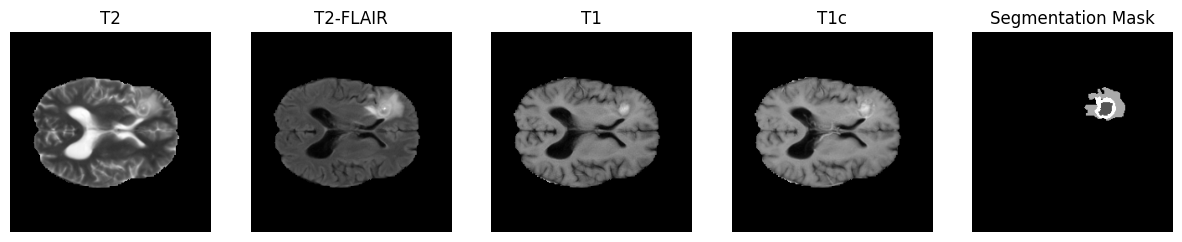

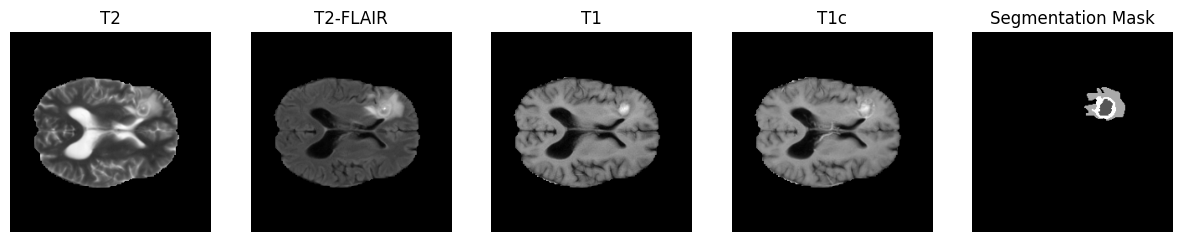

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd  # Ensure pandas is imported

def display_slices_from_df(row): #, slice_index=75
    titles = ['T2', 'T2-FLAIR', 'T1', 'T1c', 'Segmentation Mask']

    for slice_index in range(60, 76):
        plt.figure(figsize=(15, 10))

        for i, path in enumerate(row):
            if pd.notna(path):
                # Load the image data
                img = nib.load(path)
                data = img.get_fdata()

                # Normalize data for better visualization
                data = data / np.max(data)

                # Display the slice
                ax = plt.subplot(1, len(row), i + 1)
                ax.imshow(data[:, :, slice_index], cmap='gray')
                ax.title.set_text(titles[i])
                ax.axis('off')
        plt.show()



display_slices_from_df(df.iloc[8, 1:])


### Header infos

In [ ]:
t2w_path = '/kaggle/input/ssssample/sample/BraTS-MET-00379-000/BraTS-MET-00379-000-t2w.nii'  # Adjust with the actual path
seg_path = '/kaggle/input/ssssample/sample/BraTS-MET-00005-000/BraTS-MET-00005-000-seg.nii'  # Adjust with the actual path

mri_t2w_img = nib.load(t2w_path)
mri_t2w_data = mri_img.get_fdata()
header = mri_t2w_img.header
print(header)

- dim: The number of dimensions = 3 & The image volume is composed of 240 x 240 pixels over 155 slices.
- vox_offset: The data starts immediately after the header.
- scl_slope and scl_inter: Nan => No scaling is applied.

### Overlapping plots

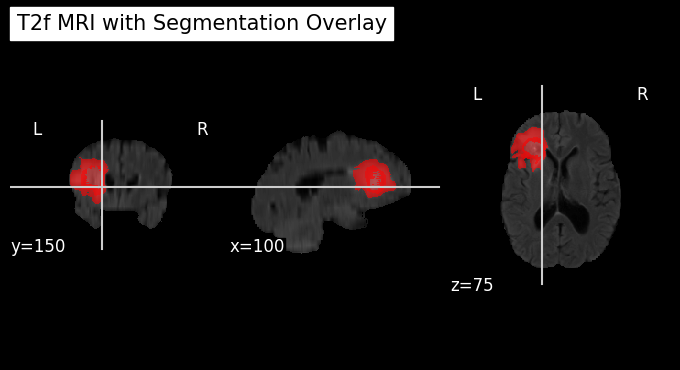

In [ ]:
import nibabel as nib
from nilearn import plotting, image
import numpy as np

mri_img = nib.load('/kaggle/input/ssssample/sample/BraTS-MET-00379-000/BraTS-MET-00379-000-t2f.nii')
seg_img = nib.load('/kaggle/input/ssssample/sample/BraTS-MET-00379-000/BraTS-MET-00379-000-seg.nii')

mri_data = mri_img.get_fdata()
seg_data = seg_img.get_fdata()

mri_data = np.nan_to_num(mri_data)
seg_data = np.nan_to_num(seg_data)

mri_img = nib.Nifti1Image(mri_data, affine=mri_img.affine)
seg_img = nib.Nifti1Image(seg_data, affine=seg_img.affine)

display = plotting.plot_anat(mri_img, title='T2f MRI with Segmentation Overlay', display_mode='ortho', cut_coords=(100, 150, 75))

display.add_overlay(seg_img, cmap=plotting.cm.red_transparent, alpha=0.8)  # Adjust alpha for transparency
plotting.show()


### GIF

In [ ]:
import nibabel as nib
import numpy as np
import imageio
import matplotlib.pyplot as plt
from IPython.display import Image, display
import io

def make_gif_from_nifti(nifti_path, gif_path, slice_axis=2):
    img = nib.load(nifti_path)
    data = img.get_fdata()

    # Normalize data for better visualization
    data = data / np.max(data)

    images = []

    num_slices = data.shape[slice_axis]
    for i in range(num_slices):
        slice_data = np.take(data, indices=i, axis=slice_axis)

        plt.figure(figsize=(10, 10))
        plt.imshow(slice_data.T, cmap='gray', origin='lower')
        plt.axis('off')
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        img_arr = imageio.imread(buf)
        images.append(img_arr)
        plt.close()
    imageio.mimsave(gif_path, images, duration=0.1)


def display_gif(gif_path):
    display(Image(filename=gif_path))



/tmp/ipykernel_35/4062966027.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(buf)


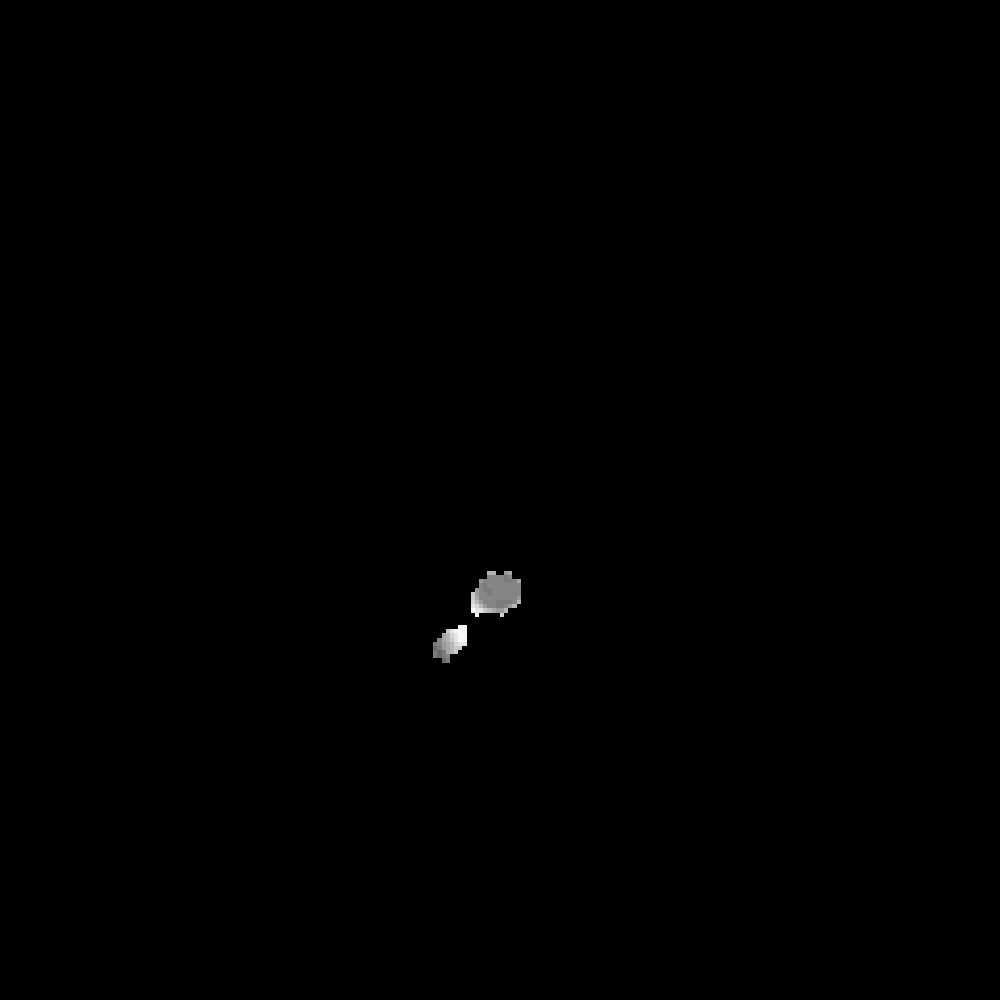

In [ ]:
nifti_path = '/kaggle/input/ssssample/sample/BraTS-MET-00379-000/BraTS-MET-00379-000-t2w.nii'
gif_path = 't1n.gif'
make_gif_from_nifti(nifti_path, gif_path)

display_gif(gif_path)
